# Structual Causal Models (SCMs)

Causal DAGs show causal relationships between variables. SCMs extend this by modeling how each variable is generated. Foramlly, SCMs have:
1. a set of **endogenous** variables $U$ corresponding to nodes in the DAG;
2. a set of **exogenous** variables $V$ to account for external, unmeasured variabels; *exogenous variables cannot be caused by endogenous variables*;
3. a set of **functions** $F$ that models each enodogenous variables from their parent nodes.

## Example
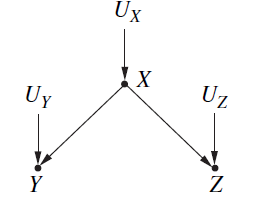

A possible SCM for this is:
$$V = \{X,Y,Z\},\ U=\{U_X,U_Y,U_Z\},\ F=\{f_X,f_Y,f_Z\}$$
$$f_X: X=U_X$$
$$f_Y: Y=4X+U_Y$$
$$f_Z: Z=\frac{X}{10} + U_Z$$

Notice that the equations contain all information from the graph. Also, the functions don't have to be linear.

# Causal Inference in Linear Systems
If we assume that the functions in the SCM are linear, then we end up with some interesting properties.

Remember that d-separation rules are actually just conditional independence statements. i.e. it tells us a set of variables $Z$ we need to condition on to make $X$ and $Y$ independent.

Conditional independence also applies to expected values (aside from probabilities). Notice that:
$$P(Y|X,Z) = P(Y|Z) \implies E[Y|X,Z] = E[Y|Z]$$ 

This is an important property because whenever we regress $Y$ on $X$, we are actually just learning a function that predicts the the value of $Y$ conditioning on $X$:
$$E[Y|X_1 = x_1, X_2=x_2, ..., X_n=x_n] = r_0+r_1x_1+r_2x_2+...+r_nx_n$$

This means that "controlling for variables" is the same as regressing $Y$ on those variables.

### Caution: Path Coefficients ≠ Regression Coefficients

**Structural or path coefficients** come from linear SCMs whereas **regression coefficients**  come from regression (regardless of the DAG). 

From the SCM above:
$$f_Y: Y=4X+U_Y$$
Here, **4** is the path coefficient of the edge connecting $X$ and $Y$.

The main difference is that path coefficients are causal statements (i.e. increasing X by 1 will *cause* Y to increase by 4. Whereas regression coefficients are just "associations".

**Regression coefficients can help with identifying path coefficients**

## Interpreting Path Coefficients

The total effect of $X$ on $Y$ is just the **sum of the products of the path coefficients of the edges on every nonbackdoor path from X to Y.** To understand this, let's try an example:

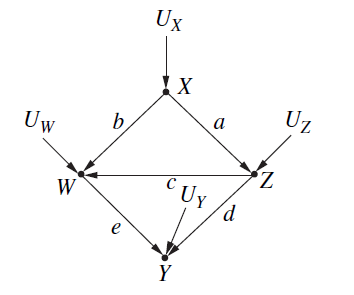

Here $a,b,c,d,e$ are path coefficients. Say we want to get the total effect of $Z$ on $Y$:
$$Y = dZ + eW + U_Y$$
$$Y = dZ + e(bX+xZ) + U_Y +eU_W$$
$$Y = (d+ec)Z + ebX + U_Y + eU_W$$
Notice that the total effect of Z on Y is just the sum of the product of every path.

The total effect of X on Y is $ace + ad + be$.

## Identifying Path Coefficients
In most cases, we don't know all the path coefficients in a graph. The challenge is to identify these path coefficient using regression coefficients (which can be derived from observed data).

Another way to get the total effect of X on Y without all the path coefficients is by using the backdoor criteria. This can be done using the ff. steps:
1. regress $Y$ on $X$ and $Z$ where $Z$ is the set of covariates that satisfies that backdoor criterion (we "control for" $Z$)
2. the coefficient of $X$ in the equation is the true causal effect of $X$ on $Y$


Aside from the backdoor criteria, we can also use regression to "block" paths that we are not interested in. For example, we may want to separate the **direct** and **indirect** effects of $X$ on $Y$:
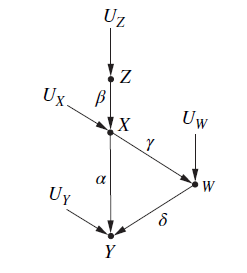

1. regress $Y$ on $X$ and $W$. This effectively blocks the indirect path from $X$ to $Y$ via $W$
2. the coefficient of $X$ in the resulting equation corresponds to $\alpha$ -- this is the direct effect
3. to get the indirect effect, remember that **Total Effect = Direct Effect + Indirect Effect** for linear systems. So we regress $Y$ on $X$ (there are no backdoor paths in this case) to get the total effect $\tau$.
4. $\tau = \alpha + \gamma\delta$. There we have it!

Actually, this is the same principle being used in **Instrumental Variables**!
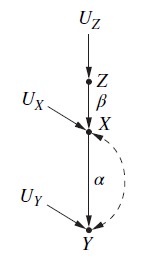

The dotted arrow represents unmeasured confounding. We can't directly measure $\alpha$ because we cannot block the backdoor path. But we can use $Z$, the instrumental variable, which has no backdoor path to Y:
1. regress Y on Z, this will result in $y = r_1z + \epsilon$
2. regress X on Z, this will result in $x = r_2z + \epsilon$
3. from the graph, we see that the total effect of $Z$ on $X$ is \beta while the total effect of $X$ on $Y$ is $\alpha\beta$
4. since there are no indirect paths from $Z$ to $X$, $\beta = r_2$, and since there are no indirect paths from $Z$ to $Y$, $\alpha\beta = r_1$
5. thus, $\alpha = r_1/r_2$

# References
- Pearl 2016, Causal Inference in Statistics: A Primer.